# Fourier Transforms and Continuous Spectra

We consider two representative nonperiodic signals:

---

## (a) Strictly Time-Limited Rectangular Pulse

The rectangular pulse of amplitude $A$ is defined as:

$$
v(t) =
\begin{cases}
A, & -\tfrac{\pi}{2} \leq t \leq \tfrac{\pi}{2} \\
0, & \text{otherwise}
\end{cases}
$$

This signal is **strictly time-limited**, since it is identically zero outside the interval
$[-\pi/2, \; \pi/2]$.

---

## (b) Asymptotically Time-Limited Exponential Pulse

An example of an **asymptotically time-limited** signal is the two-sided exponential:

$$
v(t) = A e^{-b |t|}
$$

Here $b > 0$ is the decay rate. The signal never becomes exactly zero, but it decays rapidly.
The characteristic time scale is:

$$
t = \pm \frac{1}{b}
$$

where the amplitude has decayed to

$$
v\!\left(\tfrac{1}{b}\right) = A e^{-1}.
$$

---

## Signal Energy

For a general nonperiodic signal $v(t)$, the normalized signal energy is defined as:

$$
E \;\; \triangleq \;\; \int_{-\infty}^{\infty} |v(t)|^2 \, dt
$$


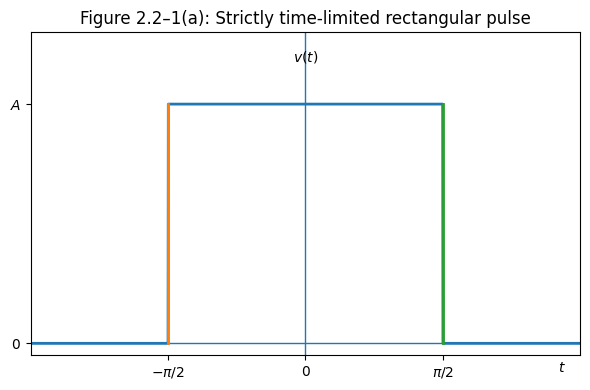

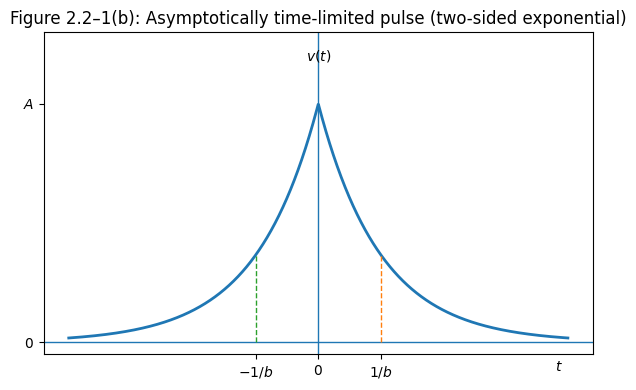

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Panel (a): Strictly time-limited rectangular pulse ----------
A = 1.0  # amplitude
t1 = np.linspace(-np.pi, np.pi, 2000)

# Rectangular pulse v(t) = A for t in [-pi/2, pi/2], 0 elsewhere
v_rect = np.where((t1 >= -np.pi/2) & (t1 <= np.pi/2), A, 0.0)

plt.figure(figsize=(6, 4))
plt.plot(t1, v_rect, linewidth=2)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Draw vertical pulse edges to emphasize rectangle
plt.plot([-np.pi/2, -np.pi/2], [0, A], linewidth=2)
plt.plot([ np.pi/2,  np.pi/2], [0, A], linewidth=2)

# Annotations & formatting
plt.xticks([-np.pi/2, 0, np.pi/2], [r'$-\pi/2$', r'$0$', r'$\pi/2$'])
plt.yticks([0, A], [r'$0$', r'$A$'])
plt.xlim(-np.pi, np.pi)
plt.ylim(-0.05*A, 1.3*A)
plt.text(0, 1.18*A, r'$v(t)$', ha='center')
plt.text(np.pi*0.95, -0.12*A, r'$t$', ha='right')
plt.title('Figure 2.2–1(a): Strictly time-limited rectangular pulse')
plt.tight_layout()
plt.show()

# ---------- Panel (b): Asymptotically time-limited pulse (two-sided exponential) ----------
A = 1.0
b = 1.5  # decay rate (the axis labels show ±1/b)
tmax = 4 / b
t2 = np.linspace(-tmax, tmax, 2000)

# Two-sided exponential v(t) = A * exp(-b |t|)
v_exp = A * np.exp(-b * np.abs(t2))

plt.figure(figsize=(6, 4))
plt.plot(t2, v_exp, linewidth=2)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Mark +/- 1/b with dashed vertical lines and annotate
one_over_b = 1.0 / b
plt.plot([ one_over_b,  one_over_b], [0, A*np.exp(-1)], linestyle='--', linewidth=1)
plt.plot([-one_over_b, -one_over_b], [0, A*np.exp(-1)], linestyle='--', linewidth=1)

# Ticks and labels
plt.xticks([-one_over_b, 0, one_over_b], [r'$-1/b$', r'$0$', r'$1/b$'])
plt.yticks([0, A], [r'$0$', r'$A$'])
plt.ylim(-0.05*A, 1.3*A)
plt.text(0, 1.18*A, r'$v(t)$', ha='center')
plt.text(tmax*0.98, -0.12*A, r'$t$', ha='right')
plt.title('Figure 2.2–1(b): Asymptotically time-limited pulse (two-sided exponential)')
plt.tight_layout()
plt.show()


## Fourier Series and Fourier Transform

### Fourier Series (Periodic Signals)

For a periodic signal $v(t)$ with period $T_0$ and fundamental frequency $f_0 = 1/T_0$:

$$
v(t) = \sum_{n=-\infty}^{\infty} c(n f_0) e^{j 2 \pi n f_0 t}
$$

where

$$
c(n f_0) = \frac{1}{T_0} \int_{T_0} v(t) e^{-j 2 \pi n f_0 t} \, dt
$$

---

### Transition to Nonperiodic Signals

As $T_0 \to \infty$:
- $f_0 = 1/T_0 \to 0$, so discrete frequency spacing vanishes.
- The summation becomes an integral.
- The Fourier series becomes the Fourier transform.

---

### Fourier Transform

The Fourier Transform of $v(t)$ is:

$$
V(f) = \mathcal{F}[v(t)] = \int_{-\infty}^{\infty} v(t) e^{-j 2 \pi f t} \, dt
$$

This expresses the signal as a function of continuous frequency $f$.

---

### Inverse Fourier Transform

The original signal is recovered from $V(f)$ by:

$$
v(t) = \mathcal{F}^{-1}[V(f)] = \int_{-\infty}^{\infty} V(f) e^{j 2 \pi f t} \, df
$$

---

### Convergence Note

- The Fourier transform may not converge pointwise everywhere.
- It **converges in the mean** (mean-square sense).
- Similar to Fourier series, Gibbs phenomenon can appear near discontinuities.


## Example: Rectangular Pulse and Its Fourier Transform

### Time-Domain Signal
Consider a rectangular pulse of width $T$:

$$
v(t) =
\begin{cases}
1, & |t| \leq \tfrac{T}{2} \\
0, & \text{otherwise}
\end{cases}
$$

---

### Fourier Transform
The Fourier transform is:

$$
V(f) = \int_{-\infty}^{\infty} v(t) e^{-j 2 \pi f t} \, dt
$$

Substituting $v(t)$ gives:

$$
V(f) = \int_{-T/2}^{T/2} e^{-j 2 \pi f t} \, dt
= \frac{\sin(\pi f T)}{\pi f}
= T \cdot \text{sinc}(fT)
$$

where

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}.
$$

---

### Inverse Fourier Transform
The original pulse is recovered by:

$$
v(t) = \int_{-\infty}^{\infty} V(f) e^{j 2 \pi f t} \, df
$$

which reconstructs the rectangular function.

---

### Key Insight
- A **rectangular pulse** in time has a **sinc spectrum** in frequency.  
- Narrowing the pulse ($T \downarrow$) makes the spectrum wider.  
- Widening the pulse ($T \uparrow$) makes the spectrum narrower.  

This illustrates the **time–frequency tradeoff**: concentration in one domain leads to spreading in the other.


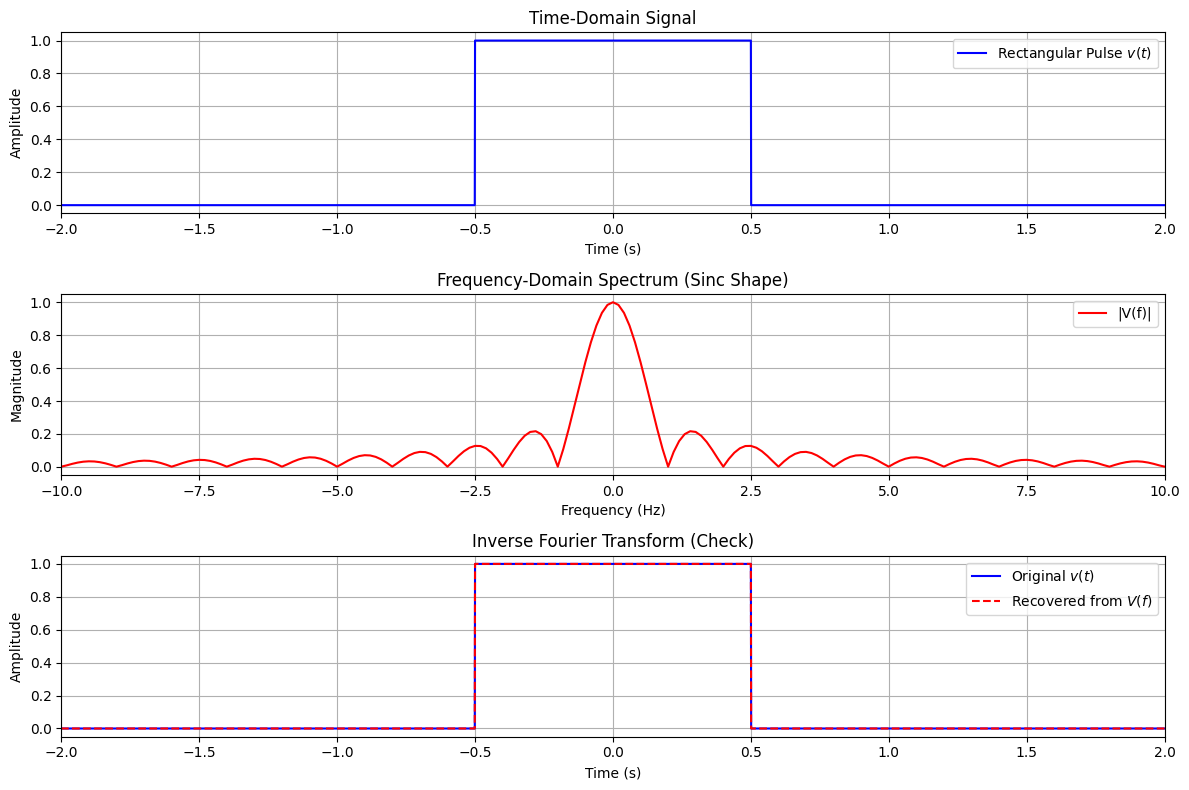

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0              # pulse width
fs = 1000            # sampling frequency (Hz)
tmax = 5             # time window for simulation
t = np.linspace(-tmax, tmax, int(2*tmax*fs), endpoint=False)

# Rectangular pulse in time domain
v_t = np.where(np.abs(t) <= T/2, 1.0, 0.0)

# Fourier Transform (using numpy FFT)
# Shift zero frequency to center for better visualization
V_f = np.fft.fftshift(np.fft.fft(v_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(v_t), d=1/fs))

# Normalize FFT to approximate continuous-time Fourier transform
V_f = V_f / fs

# Inverse Fourier Transform (numerical check)
v_t_recovered = np.fft.ifft(np.fft.ifftshift(V_f * fs)).real

# --- Plot results ---

plt.figure(figsize=(12, 8))

# Time-domain pulse
plt.subplot(3, 1, 1)
plt.plot(t, v_t, 'b', label='Rectangular Pulse $v(t)$')
plt.xlim(-2, 2)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Frequency-domain (magnitude spectrum)
plt.subplot(3, 1, 2)
plt.plot(freqs, np.abs(V_f), 'r', label='|V(f)|')
plt.xlim(-10, 10)
plt.title("Frequency-Domain Spectrum (Sinc Shape)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

# Reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, v_t, 'b', label='Original $v(t)$')
plt.plot(t, v_t_recovered, 'r--', label='Recovered from $V(f)$')
plt.xlim(-2, 2)
plt.title("Inverse Fourier Transform (Check)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Example: Sinusoid and Its Fourier Transform

### Time-Domain Signal
Consider a complex sinusoid:

$$
v(t) = e^{j 2 \pi f_0 t}
$$

---

### Fourier Transform
The Fourier transform is:

$$
V(f) = \int_{-\infty}^{\infty} e^{j 2 \pi f_0 t} \, e^{-j 2 \pi f t} \, dt
= \int_{-\infty}^{\infty} e^{-j 2 \pi (f - f_0) t} \, dt
$$

This integral does not converge in the ordinary sense, but in the distributional sense it yields:

$$
V(f) = \delta(f - f_0)
$$

where $\delta(\cdot)$ is the Dirac delta function.

---

### Inverse Transform
The inverse Fourier transform is:

$$
v(t) = \int_{-\infty}^{\infty} \delta(f - f_0) e^{j 2 \pi f t} \, df
= e^{j 2 \pi f_0 t}
$$

---

### Key Insight
- A **pure sinusoid** corresponds to an **impulse** in frequency.  
- All of its energy is concentrated at a single frequency $f_0$.  
- Contrast with the rectangular pulse: compact in time → spread in frequency.  
- This illustrates the **duality**: localized in time ↔ spread in frequency, infinite in time ↔ localized in frequency.


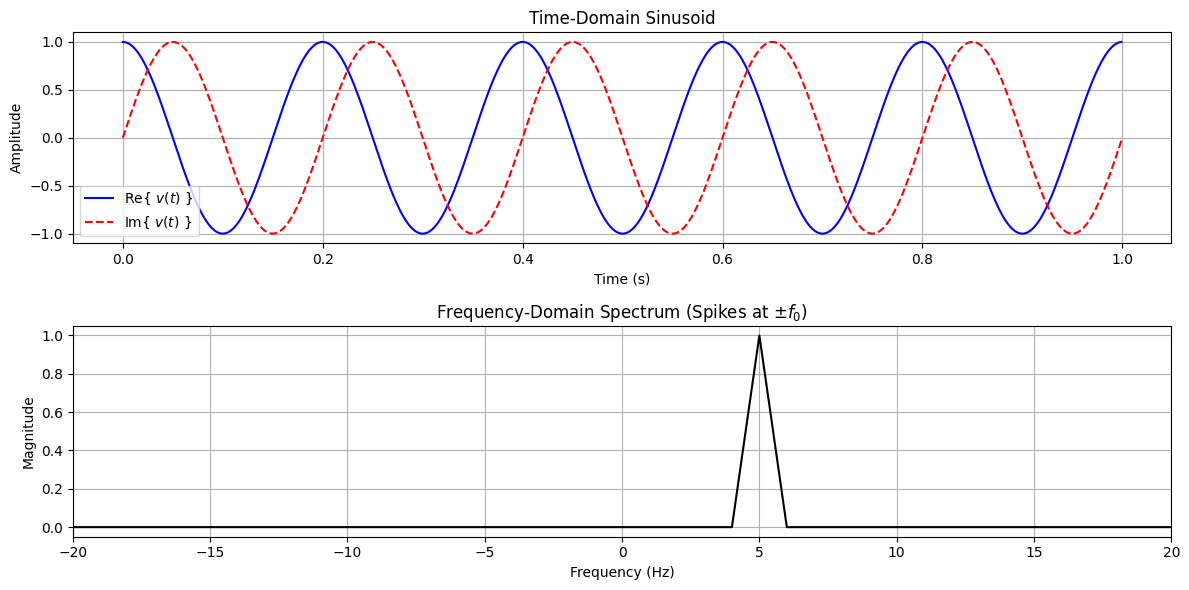

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000       # sampling frequency
duration = 1.0  # finite time window
f0 = 5          # sinusoid frequency

t = np.linspace(0, duration, int(fs*duration), endpoint=False)
v_t = np.exp(1j * 2 * np.pi * f0 * t)  # complex sinusoid

# Fourier Transform via FFT
V_f = np.fft.fftshift(np.fft.fft(v_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(v_t), d=1/fs))

# Normalize
V_f = V_f / len(v_t)

# --- Plot results ---

plt.figure(figsize=(12, 6))

# Time-domain sinusoid
plt.subplot(2, 1, 1)
plt.plot(t, np.real(v_t), 'b', label='Re{ $v(t)$ }')
plt.plot(t, np.imag(v_t), 'r--', label='Im{ $v(t)$ }')
plt.title("Time-Domain Sinusoid")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Frequency-domain spectrum (should show spikes at ±f0)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(V_f), 'k')
plt.title("Frequency-Domain Spectrum (Spikes at ±$f_0$)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(-20, 20)
plt.grid(True)

plt.tight_layout()
plt.show()


## Fourier Transform Duality Reference

This table shows common signals and their Fourier transform pairs  
(assuming unit amplitude, with standard $\mathcal{F}[v(t)]$ definition):

| Time-Domain Signal $v(t)$                         | Frequency-Domain Transform $V(f)$                        | Notes |
|---------------------------------------------------|----------------------------------------------------------|-------|
| $\delta(t)$                                       | $1$                                                      | Delta in time → flat spectrum |
| $1$ (constant)                                    | $\delta(f)$                                              | Infinite in time → single DC spike |
| $e^{j 2 \pi f_0 t}$                               | $\delta(f - f_0)$                                        | Pure sinusoid → single frequency |
| $\cos(2 \pi f_0 t)$                               | $\tfrac{1}{2} \left[\delta(f - f_0) + \delta(f + f_0)\right]$ | Real sinusoid → two symmetric spikes |
| $\text{rect}\!\left(\tfrac{t}{T}\right)$          | $T \, \text{sinc}(fT)$                                   | Rectangular pulse ↔ sinc spectrum |
| $\text{sinc}(t/T)$                                | $T \, \text{rect}(fT)$                                   | Dual of rect ↔ sinc |
| $e^{-a|t|}, \; a>0$                               | $\tfrac{2a}{a^2 + (2\pi f)^2}$                           | Decaying exponential ↔ Lorentzian spectrum |
| Gaussian $e^{-t^2 / (2\sigma^2)}$                 | $\sigma \sqrt{2\pi} \, e^{-(2 \pi f)^2 \sigma^2 / 2}$    | Gaussian ↔ Gaussian (self-dual) |

---

### Key Insights
- **Localization tradeoff**: narrow in time → wide in frequency; wide in time → narrow in frequency.  
- **Duality**: rect ↔ sinc, sinc ↔ rect.  
- **Delta duality**: $\delta(t)$ ↔ flat, constant in time ↔ $\delta(f)$.  
- **Gaussian**: only function that is its own Fourier transform (shape preserved).  


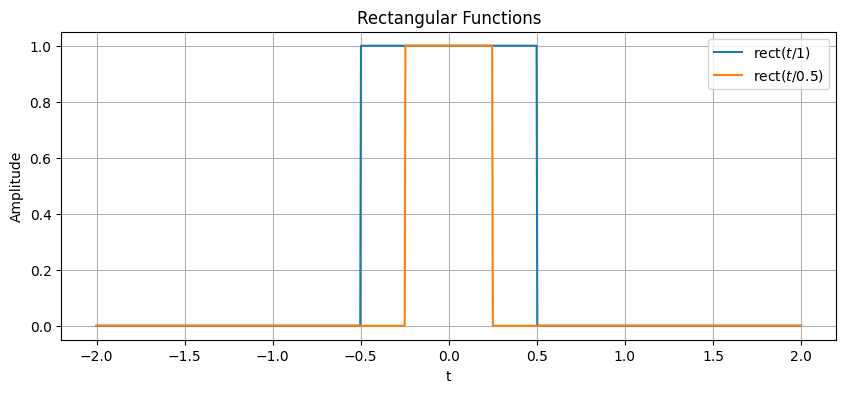

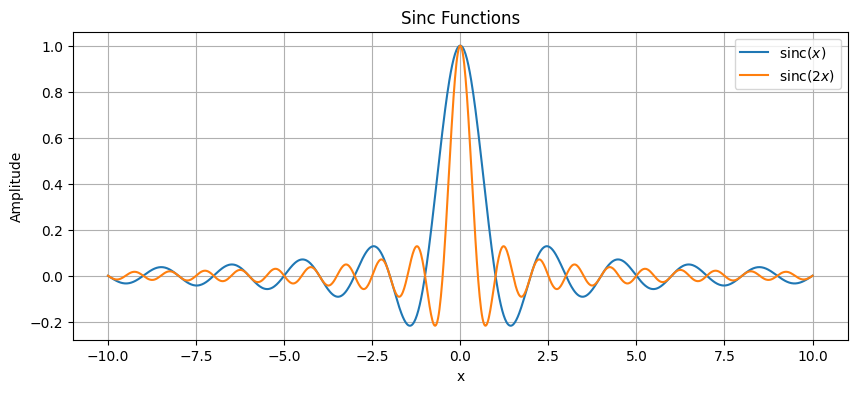

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rect(t, T=1.0):
    """
    Rectangular function: rect(t/T)
    = 1 for |t| <= T/2, 0 otherwise
    """
    return np.where(np.abs(t) <= T/2, 1.0, 0.0)

def sinc(x):
    """
    Normalized sinc function: sin(pi x) / (pi x)
    Matches the Fourier transform convention
    """
    return np.sinc(x)  # numpy's sinc is sin(pi x) / (pi x)

# --- Demo plots ---

t = np.linspace(-2, 2, 1000)

# Rectangular pulse
plt.figure(figsize=(10,4))
plt.plot(t, rect(t, T=1.0), label=r"$\text{rect}(t/1)$")
plt.plot(t, rect(t, T=0.5), label=r"$\text{rect}(t/0.5)$")
plt.title("Rectangular Functions")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Sinc functions
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10,4))
plt.plot(x, sinc(x), label=r"$\text{sinc}(x)$")
plt.plot(x, sinc(2*x), label=r"$\text{sinc}(2x)$")
plt.title("Sinc Functions")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### Analytic pair reminder

Time:
$$ v(t) = \text{sinc}\!\Big(\frac{t}{T}\Big) = \frac{\sin\!\big(\pi \frac{t}{T}\big)}{\pi \frac{t}{T}} $$

Frequency (continuous FT):
$$ V(f) = T\,\text{rect}(fT) \quad \text{where} \quad
\text{rect}(x)=\begin{cases}
1,& |x|\le \tfrac12\\
0,& \text{otherwise}
\end{cases} $$


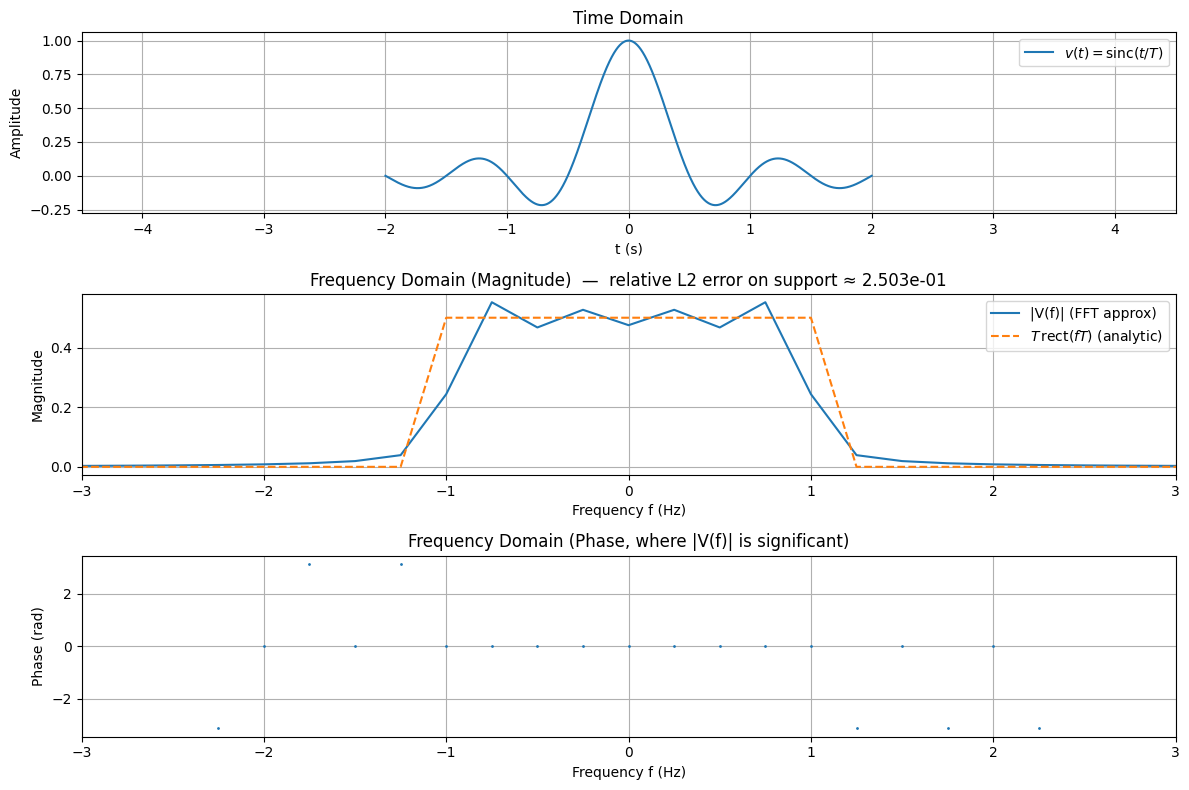

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
T = 0.5            # sets the "width" of rect in frequency: support is |f| <= 1/(2T)
fs = 20000         # sampling rate (Hz) - high to reduce discretization error
t_halfspan = 2.0   # simulate on [-t_halfspan, t_halfspan)
N = int(2 * t_halfspan * fs)

# Ensure N is even for clean fftshift symmetry
if N % 2 == 1:
    N += 1

# --- Grids & differentials ---
t = np.linspace(-t_halfspan, t_halfspan, N, endpoint=False)
dt = t[1] - t[0]
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dt))  # Hz
df = freqs[1] - freqs[0]

# --- Define sinc and rect consistent with the analysis ---
def sinc_norm(x):
    """Normalized sinc: sin(pi x)/(pi x)."""
    return np.sinc(x)

def rect(x):
    """rect(x) = 1 for |x|<=1/2; 0 otherwise."""
    return np.where(np.abs(x) <= 0.5, 1.0, 0.0)

# Time-domain signal: v(t) = sinc(t/T)
v_t = sinc_norm(t / T)

# --- Continuous-FT approximation via FFT ---
# Riemann-sum scaling: V(f) ≈ dt * FFT{v(t)}
V_f = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(v_t))) * dt

# --- Analytic target ---
V_true = T * rect(freqs * T)

# --- Compare magnitude and phase on the main support ---
# Compute error metrics (L2 relative error on the nonzero-support band)
support_mask = np.abs(freqs) <= (1.0 / (2.0 * T) + 1e-12)
num = np.linalg.norm(np.abs(V_f[support_mask]) - V_true[support_mask])
den = np.linalg.norm(V_true[support_mask]) + 1e-15
rel_err = num / den

# --- Plots ---
plt.figure(figsize=(12, 8))

# Time domain
plt.subplot(3,1,1)
plt.plot(t, v_t, label=r'$v(t)=\mathrm{sinc}(t/T)$')
plt.xlim(-1.5*T*6, 1.5*T*6)  # show a few lobes
plt.title("Time Domain")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Magnitude in frequency
plt.subplot(3,1,2)
plt.plot(freqs, np.abs(V_f), label=r'|V(f)| (FFT approx)')
plt.plot(freqs, V_true, '--', label=r'$T\,\mathrm{rect}(fT)$ (analytic)')
plt.xlim(-3/(2*T), 3/(2*T))
plt.title(f"Frequency Domain (Magnitude)  —  relative L2 error on support ≈ {rel_err:.3e}")
plt.xlabel("Frequency f (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

# Phase in frequency (only where magnitude is significant)
mag = np.abs(V_f)
phase = np.angle(V_f)
sig_mask = mag > (0.01 * mag.max())  # avoid noisy phase where magnitude ~ 0

plt.subplot(3,1,3)
plt.plot(freqs[sig_mask], phase[sig_mask], '.', ms=2)
plt.xlim(-3/(2*T), 3/(2*T))
plt.title("Frequency Domain (Phase, where |V(f)| is significant)")
plt.xlabel("Frequency f (Hz)")
plt.ylabel("Phase (rad)")
plt.grid(True)

plt.tight_layout()
plt.show()


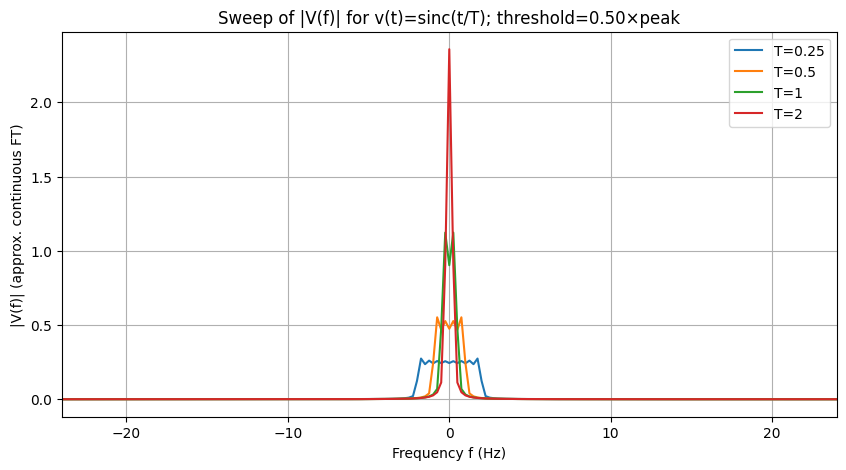

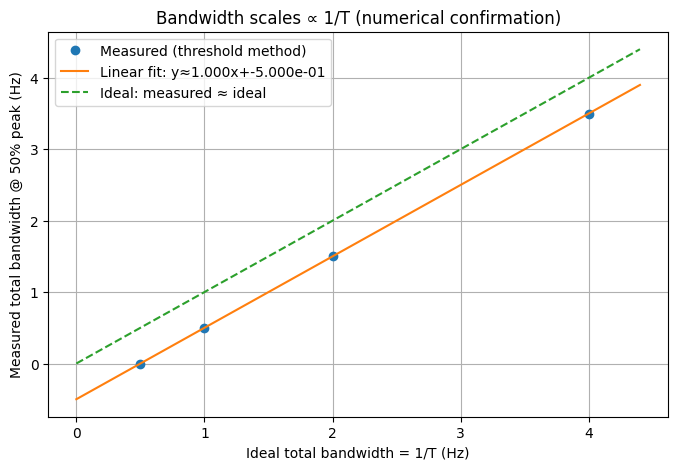

T	Ideal(1/T)	MeasuredBW(threshold)
0.250	4.000000	3.500000
0.500	2.000000	1.500000
1.000	1.000000	0.500000
2.000	0.500000	0.000000


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
T_values   = [0.25, 0.5, 1.0, 2.0]  # sweep of T
thr_frac   = 0.50                   # threshold as fraction of peak to measure bandwidth
fs         = 20000                  # sampling rate (Hz)
t_halfspan = 2.0                    # simulate on [-t_halfspan, t_halfspan)

# Build time/freq grids
N = int(2 * t_halfspan * fs)
if N % 2 == 1:
    N += 1

t = np.linspace(-t_halfspan, t_halfspan, N, endpoint=False)
dt = t[1] - t[0]
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dt))
df = freqs[1] - freqs[0]

def sinc_norm(x):
    # normalized sinc: sin(pi x)/(pi x)
    return np.sinc(x)

def rect(x):
    # 1 for |x|<=1/2 else 0
    return np.where(np.abs(x) <= 0.5, 1.0, 0.0)

# -----------------------------
# Sweep, compute spectra, measure bandwidth
# -----------------------------
measured_BW = []   # measured total bandwidth (Hz) at thr_frac level
ideal_BW    = []   # ideal total bandwidth = 1/T

plt.figure(figsize=(10, 5))
for T in T_values:
    v_t = sinc_norm(t / T)

    # FFT with Riemann-sum scaling to approximate continuous FT
    V_f = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(v_t))) * dt
    mag = np.abs(V_f)
    peak = mag.max()

    # Threshold mask; measure width of set where magnitude >= thr_frac*peak
    mask = mag >= (thr_frac * peak)
    if np.any(mask):
        f_left  = freqs[mask][0]
        f_right = freqs[mask][-1]
        bw = f_right - f_left      # total width above threshold
    else:
        bw = np.nan

    measured_BW.append(bw)
    ideal_BW.append(1.0 / T)

    # Overlay spectra
    plt.plot(freqs, mag, label=f"T={T:g}")

plt.xlim(-6 / (min(T_values)), 6 / (min(T_values)))  # show several lobes of the smallest T
plt.xlabel("Frequency f (Hz)")
plt.ylabel("|V(f)| (approx. continuous FT)")
plt.title(f"Sweep of |V(f)| for v(t)=sinc(t/T); threshold={thr_frac:.2f}×peak")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Compare measured vs ideal bandwidth
# -----------------------------
measured_BW = np.array(measured_BW)
ideal_BW    = np.array(ideal_BW)

# Scatter: measured BW vs ideal 1/T
plt.figure(figsize=(8, 5))
plt.plot(ideal_BW, measured_BW, "o", label="Measured (threshold method)")
# Best-fit line for visual sanity check
coef = np.polyfit(ideal_BW[~np.isnan(measured_BW)], measured_BW[~np.isnan(measured_BW)], 1)
fit = np.poly1d(coef)
x_line = np.linspace(0, 1.1*ideal_BW.max(), 200)
plt.plot(x_line, fit(x_line), "-", label=f"Linear fit: y≈{coef[0]:.3f}x+{coef[1]:.3e}")
plt.plot(x_line, x_line, "--", label="Ideal: measured ≈ ideal")
plt.xlabel("Ideal total bandwidth = 1/T (Hz)")
plt.ylabel(f"Measured total bandwidth @ {thr_frac:.0%} peak (Hz)")
plt.title("Bandwidth scales ∝ 1/T (numerical confirmation)")
plt.grid(True)
plt.legend()
plt.show()

# Print a small table
print("T\tIdeal(1/T)\tMeasuredBW(threshold)")
for T, ibw, mbw in zip(T_values, ideal_BW, measured_BW):
    print(f"{T:.3f}\t{ibw:.6f}\t{mbw:.6f}")


In [1]:
# Interactive Fourier demo: sinc(t/T) ↔ T·rect(fT) using ipywidgets
# Convention:  V(f) = ∫ v(t) e^{-j 2π f t} dt  and  v(t) = ∫ V(f) e^{+j 2π f t} df

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, HBox, VBox, Layout
from IPython.display import display, clear_output

# ---------- Utilities ----------
def sinc_norm(x):
    """Normalized sinc: sin(pi x) / (pi x)."""
    return np.sinc(x)

def rect(x):
    """rect(x) = 1 for |x| <= 1/2, else 0."""
    return np.where(np.abs(x) <= 0.5, 1.0, 0.0)

def compute_spectrum(T=0.5, fs=20000, t_halfspan=2.0):
    """
    Build time/freq grids and compute continuous-FT approximation via FFT
    using Riemann-sum scaling: V(f) ≈ dt * FFT{v(t)}.
    """
    N = int(2 * t_halfspan * fs)
    if N % 2 == 1:
        N += 1
    t = np.linspace(-t_halfspan, t_halfspan, N, endpoint=False)
    dt = t[1] - t[0]
    freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dt))  # Hz
    v_t = sinc_norm(t / T)
    V_f = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(v_t))) * dt  # Riemann scaling
    return t, v_t, freqs, V_f, dt

# ---------- Interactive plot callback ----------
def plot_interactive(T=0.5, thr_frac=0.5, fs=20000, t_halfspan=2.0, view="Frequency |V(f)|"):
    """
    Render either the time-domain signal v(t) or the magnitude spectrum |V(f)| with
    the analytic T·rect(fT) overlay and measured bandwidth at a threshold.
    """
    t, v_t, freqs, V_f, dt = compute_spectrum(T=T, fs=fs, t_halfspan=t_halfspan)
    mag = np.abs(V_f)
    peak = mag.max()
    ideal = T * rect(freqs * T)

    # Measured total bandwidth at threshold
    mask = mag >= (thr_frac * peak)
    if np.any(mask):
        f_left = freqs[mask][0]
        f_right = freqs[mask][-1]
        bw_measured = f_right - f_left
    else:
        f_left = f_right = np.nan
        bw_measured = np.nan
    bw_ideal = 1.0 / T

    clear_output(wait=True)

    if view.startswith("Time"):
        plt.figure(figsize=(9, 4.5))
        plt.plot(t, v_t, label=r"$v(t)=\mathrm{sinc}(t/T)$")
        plt.title("Time Domain")
        plt.xlabel("t (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.legend()
        # show a few lobes for context
        plt.xlim(-3*T, 3*T)
        plt.show()
    else:
        plt.figure(figsize=(9, 4.5))
        plt.plot(freqs, mag, label=r"$|V(f)|$ (FFT approx)")
        plt.plot(freqs, ideal, "--", label=r"$T\,\mathrm{rect}(fT)$ (analytic)")
        plt.title("Frequency Domain (Magnitude)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel(r"$|V(f)|$")
        plt.grid(True)
        plt.legend()
        # show a few multiples of the ideal support for clarity
        plt.xlim(-3/(2*T), 3/(2*T))
        plt.show()

    print(f"T = {T:.4f} s   |   Threshold = {thr_frac:.0%} of peak")
    print(f"Ideal bandwidth (total) = 1/T = {bw_ideal:.6f} Hz")
    print(f"Measured bandwidth (total, at threshold) ≈ {bw_measured:.6f} Hz")
    if np.isfinite(f_left) and np.isfinite(f_right):
        print(f"Threshold crossings ≈ [{f_left:.6f}, {f_right:.6f}] Hz")
    else:
        print("Threshold crossings not detected (consider lower threshold or larger fs/window).")

# ---------- Widgets ----------
T_slider    = FloatSlider(value=0.5, min=0.1, max=2.0, step=0.05, description="T", continuous_update=False)
thr_slider  = FloatSlider(value=0.5, min=0.05, max=0.95, step=0.05, description="Thresh", continuous_update=False)
fs_slider   = IntSlider(value=20000, min=2000, max=80000, step=2000, description="fs (Hz)", continuous_update=False)
span_slider = FloatSlider(value=2.0, min=0.5, max=6.0, step=0.5, description="t_halfspan", continuous_update=False)
view_dd     = Dropdown(options=["Frequency |V(f)|", "Time v(t)"], value="Frequency |V(f)|", description="View")

# Layout container (optional—nice alignment)
ui = VBox([
    HBox([T_slider, thr_slider], layout=Layout(justify_content="space-between")),
    HBox([fs_slider, span_slider, view_dd], layout=Layout(justify_content="space-between"))
])

# Wire up interact
out = interact(
    plot_interactive,
    T=T_slider,
    thr_frac=thr_slider,
    fs=fs_slider,
    t_halfspan=span_slider,
    view=view_dd
)

display(ui)


interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='T', max=2.0, min=0.1, step=…

## Demonstration: Hermitian Symmetry of the Fourier Transform

We take a **real rectangular pulse** in time:

$$
v(t) =
\begin{cases}
1, & |t| \leq \tfrac{T}{2} \\
0, & \text{otherwise}
\end{cases}
$$

and compute its Fourier transform:

$$
V(f) = \int_{-\infty}^{\infty} v(t)\, e^{-j 2 \pi f t}\, dt
= T \cdot \mathrm{sinc}(fT).
$$

---

### Key Properties Illustrated

1. **Complex Spectrum**  
   $V(f)$ is generally complex. We look at:  
   - $|V(f)|$: the **amplitude spectrum**  
   - $\arg V(f)$: the **phase spectrum**

2. **Value at Zero Frequency**  
   At $f=0$:
   $$
   V(0) = \int_{-\infty}^{\infty} v(t)\, dt
   $$
   which equals the **net area under the pulse**.

3. **Hermitian Symmetry for Real Signals**  
   If $v(t)$ is real:  
   $$
   V(-f) = V^*(f)
   $$
   which implies:
   - $|V(-f)| = |V(f)|$ (magnitude is **even**)  
   - $\arg V(-f) = - \arg V(f)$ (phase is **odd**)  

---

### What You Will See in the Plots

1. **Time Domain**: A rectangular pulse centered at $t=0$.  
2. **Frequency Magnitude**: A sinc-shaped curve, symmetric about $f=0$.  
3. **Frequency Phase**: Odd symmetry — phase values at negative frequencies are the negatives of the positive-frequency values.

---

### Numerical Verification

- The code checks that $V(0)$ from the FFT matches the area under $v(t)$.  
- It confirms even/odd symmetry numerically (Hermitian symmetry).  

This directly connects the **mathematical properties** of the Fourier transform to their **numerical/visual demonstration**.


Conjugate-symmetry (complex)  : True
Magnitude evenness             : True
Phase oddness (mod 2π)        : True
DC purely real?                : True
V(0) from FFT (real part)     ≈ 0.799950
∫ v(t) dt (time-domain area)  ≈ 0.799950


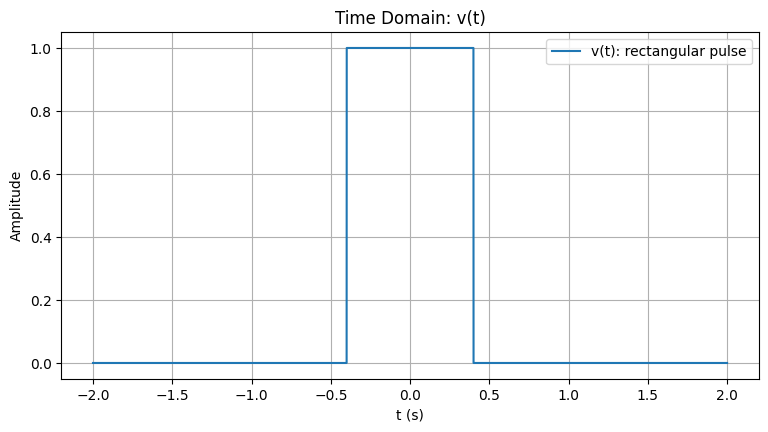

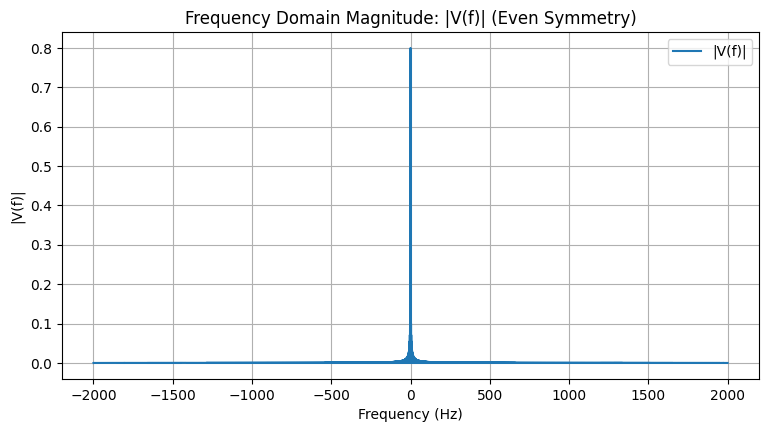

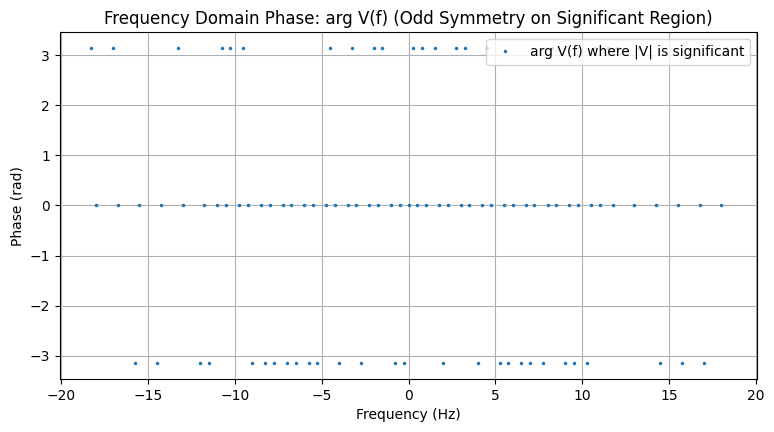

In [13]:
# Fourier symmetry demo (robust): real rectangular pulse
# Convention:
#   Forward:  V(f) = ∫ v(t) e^{-j 2π f t} dt
#   Inverse:  v(t) = ∫ V(f) e^{+j 2π f t} df
# Discrete approximation (Riemann scaling):
#   V(f_k) ≈ dt * FFT{v(t_n)}
#
# This cell:
#   1) Forces odd N so t=0 is exactly in the grid (avoids linear phase from half-sample offset).
#   2) Checks conjugate symmetry in UNshifted FFT order (pairs align exactly).
#   3) Tests phase oddness modulo 2π (handles phase wrapping).
#   4) Plots v(t), |V(f)|, and arg V(f) (masked where |V| is tiny).

import numpy as np
import matplotlib.pyplot as plt

# ----- Parameters (edit as needed) -----
T = 0.8            # pulse width (seconds)
fs = 4000          # sampling frequency (Hz)
t_halfspan = 2.0   # simulate on [-t_halfspan, t_halfspan)
phase_mask_frac = 0.02  # show phase only where |V(f)| > this fraction of max (to avoid noisy tails)

# ----- Build odd-length time grid so t = 0 is included exactly -----
N = int(2 * t_halfspan * fs)
if N % 2 == 0:   # force odd N
    N += 1
t = np.linspace(-t_halfspan, t_halfspan, N, endpoint=False)
dt = t[1] - t[0]
assert np.isclose(t[np.argmin(np.abs(t))], 0.0, atol=dt/2), "Center sample should be ~0."

# ----- Real time-domain signal: rectangular pulse -----
v_t = (np.abs(t) <= T/2).astype(float)
assert np.isrealobj(v_t)

# ----- Unshifted DFT for exact pairwise symmetry checks (Riemann scaling) -----
V_un = np.fft.fft(v_t) * dt              # unshifted spectrum (complex)
f_un = np.fft.fftfreq(N, d=dt)           # unshifted frequency grid (Hz)

# Indices for positive/negative frequency pairs (exclude DC; no Nyquist when N is odd)
pos = np.arange(1, (N - 1)//2 + 1)       # strictly positive bins for odd N
neg = N - pos                             # their negative counterparts

# ----- Conjugate-symmetry & magnitude-even checks -----
cs_ok  = np.allclose(V_un[pos], np.conj(V_un[neg]), rtol=1e-9, atol=1e-12)
mag_ok = np.allclose(np.abs(V_un[pos]), np.abs(V_un[neg]), rtol=1e-9, atol=1e-12)

# ----- Phase oddness modulo 2π (robust to wrapping) -----
phi_pos = np.angle(V_un[pos])
phi_neg = np.angle(V_un[neg])
mag_pos = np.abs(V_un[pos])
mag_neg = np.abs(V_un[neg])
sig = (mag_pos > 1e-6 * mag_pos.max()) & (mag_neg > 1e-6 * mag_neg.max())
wrapped_err = np.angle(np.exp(1j * (phi_neg + phi_pos)))  # should be ~0 modulo 2π
phase_ok_wrapped = np.allclose(wrapped_err[sig], 0.0, atol=5e-3)

# ----- DC value vs. time-domain area sanity check -----
V0_numeric = V_un[np.argmin(np.abs(f_un))].real
area_time = v_t.sum() * dt

print(f"Conjugate-symmetry (complex)  : {cs_ok}")
print(f"Magnitude evenness             : {mag_ok}")
print(f"Phase oddness (mod 2π)        : {phase_ok_wrapped}")
print(f"DC purely real?                : {np.allclose(V_un[0].imag, 0.0, atol=1e-12)}")
print(f"V(0) from FFT (real part)     ≈ {V0_numeric:.6f}")
print(f"∫ v(t) dt (time-domain area)  ≈ {area_time:.6f}")

# ----- Shifted spectrum for visualization -----
V_f   = np.fft.fftshift(V_un)
freqs = np.fft.fftshift(f_un)
mag   = np.abs(V_f)
phase = np.angle(V_f)

# Mask for phase plot where magnitude is significant
sig_mask = mag > (phase_mask_frac * mag.max())

# ----- Plot: Time domain -----
plt.figure(figsize=(9, 4.5))
plt.plot(t, v_t, label="v(t): rectangular pulse")
plt.title("Time Domain: v(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# ----- Plot: |V(f)| (even magnitude for real signals) -----
plt.figure(figsize=(9, 4.5))
plt.plot(freqs, mag, label="|V(f)|")
plt.title("Frequency Domain Magnitude: |V(f)| (Even Symmetry)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|V(f)|")
plt.grid(True)
plt.legend()
plt.show()

# ----- Plot: arg V(f) (odd phase on significant region) -----
plt.figure(figsize=(9, 4.5))
plt.plot(freqs[sig_mask], phase[sig_mask], ".", ms=3, label="arg V(f) where |V| is significant")
plt.title("Frequency Domain Phase: arg V(f) (Odd Symmetry on Significant Region)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")
plt.grid(True)
plt.legend()
plt.show()
